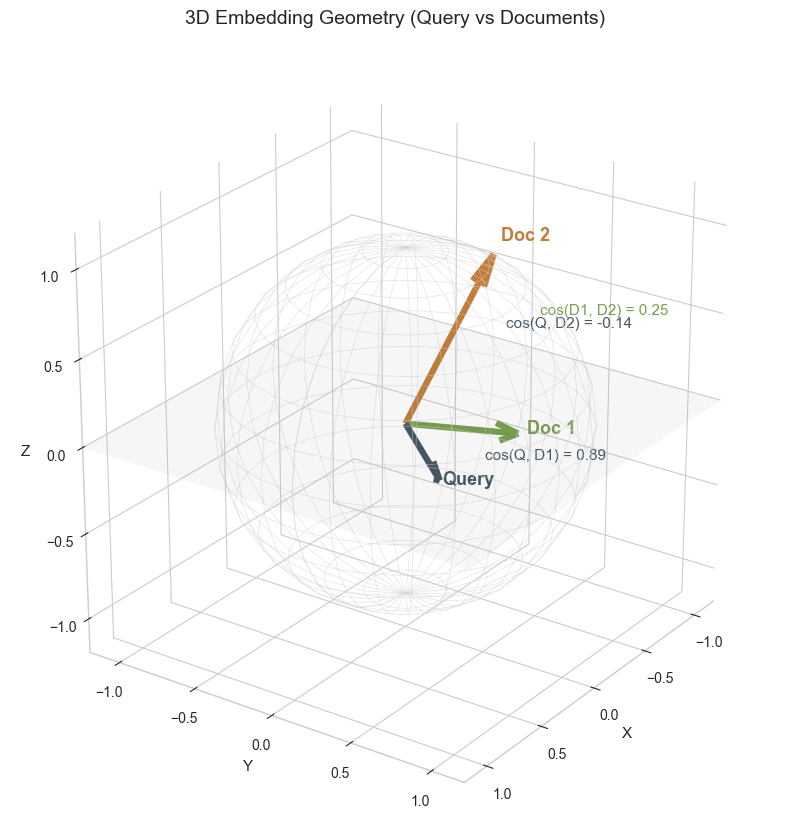

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_vectors_pretty(q, d1, d2, normalize=True):
    vectors = np.vstack([q, d1, d2])

    # --- normalize so everything lies on the unit sphere ---
    if normalize:
        norms = np.linalg.norm(vectors, axis=1, keepdims=True)
        norms[norms == 0] = 1
        vectors = vectors / norms

    q, d1, d2 = vectors
    origin = np.array([0., 0., 0.])

    # --- helpers ---
    def cos_sim(a, b):
        return float(np.dot(a, b) /
                     (np.linalg.norm(a) * np.linalg.norm(b)))

    def draw_arrow(vec, color, label):
        ax.quiver(
            origin[0], origin[1], origin[2],
            vec[0], vec[1], vec[2],
            color=color,
            linewidth=4.5,
            arrow_length_ratio=0.18
        )
        ax.text(vec[0]*1.08, vec[1]*1.08, vec[2]*1.08,
                label, color=color, fontsize=13, weight="bold")

    # --- cosines + angles ---
    cos_q_d1 = cos_sim(q, d1)
    cos_q_d2 = cos_sim(q, d2)
    cos_d1_d2 = cos_sim(d1, d2)

    # points to place cosine labels (midpoints on sphere)
    mid_q_d1  = (q + d1) / np.linalg.norm(q + d1)
    mid_q_d2  = (q + d2) / np.linalg.norm(q + d2)
    mid_d1_d2 = (d1 + d2) / np.linalg.norm(d1 + d2)

    # --- figure + axes ---
    fig = plt.figure(figsize=(8, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor("white")

    # ground plane (z = 0) for depth cue
    xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 2),
                         np.linspace(-1.2, 1.2, 2))
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, alpha=0.05, color="grey")

    # wireframe unit sphere for geometry intuition
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color='lightgray',
                      alpha=0.6, linewidth=0.5)

    # --- draw vectors ---
    draw_arrow(q,  "#435663", "Query")
    draw_arrow(d1, "#7A9E4D", "Doc 1")
    draw_arrow(d2, "#C27D3A", "Doc 2")

    # --- cosine labels in 3D space ---
    ax.text(*(mid_q_d1*1.05),
            f"cos(Q, D1) = {cos_q_d1:.2f}",
            color="#435663", fontsize=11)

    ax.text(*(mid_q_d2*1.05),
            f"cos(Q, D2) = {cos_q_d2:.2f}",
            color="#435663", fontsize=11)

    ax.text(*(mid_d1_d2*1.05),
            f"cos(D1, D2) = {cos_d1_d2:.2f}",
            color="#7A9E4D", fontsize=11)

    # --- styling / camera ---
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])

    ax.set_xlabel("X", fontsize=11)
    ax.set_ylabel("Y", fontsize=11)
    ax.set_zlabel("Z", fontsize=11)

    ax.set_box_aspect([1, 1, 1])
    ax.view_init(elev=25, azim=35)  # make 3D more obvious

    ax.set_title("3D Embedding Geometry (Query vs Documents)",
                 fontsize=14, pad=18)

    # lighter grid + no heavy box
    ax.grid(True, linestyle=":", linewidth=0.5)
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis.pane.set_alpha(0.0)

    plt.tight_layout()
    plt.show()


# Example
q  = np.array([1.0, 1.0, 0.2])
d1 = np.array([0.2, 0.6, 0.2])
d2 = np.array([-0.6, 0.2, 0.9])

visualize_3d_vectors_pretty(q, d1, d2)


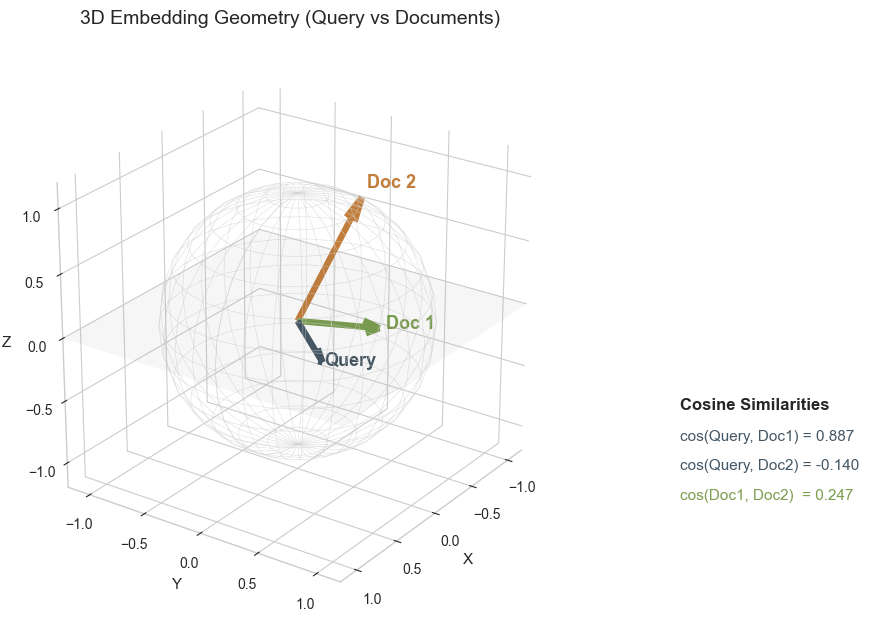

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_vectors_pretty(q, d1, d2, normalize=True):
    vectors = np.vstack([q, d1, d2])

    # --- normalize so everything lies on the unit sphere ---
    if normalize:
        norms = np.linalg.norm(vectors, axis=1, keepdims=True)
        norms[norms == 0] = 1
        vectors = vectors / norms

    q, d1, d2 = vectors
    origin = np.array([0., 0., 0.])

    # --- helpers ---
    def cos_sim(a, b):
        return float(np.dot(a, b) /
                     (np.linalg.norm(a) * np.linalg.norm(b)))

    # --- cosines ---
    cos_q_d1 = cos_sim(q, d1)
    cos_q_d2 = cos_sim(q, d2)
    cos_d1_d2 = cos_sim(d1, d2)

    # --- figure: 3D plot (left) + smaller sidebar (right) ---
    fig = plt.figure(figsize=(10, 7))

    # 3D axis takes more space now
    ax = fig.add_axes([0.05, 0.1, 0.72, 0.8], projection='3d')
    ax.set_facecolor("white")

    # ground plane (z = 0)
    xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 2),
                         np.linspace(-1.2, 1.2, 2))
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, alpha=0.05, color="grey")

    # wireframe unit sphere
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color='lightgray',
                      alpha=0.6, linewidth=0.5)

    # draw arrows
    def draw_arrow(vec, color, label):
        ax.quiver(
            origin[0], origin[1], origin[2],
            vec[0], vec[1], vec[2],
            color=color,
            linewidth=4.5,
            arrow_length_ratio=0.18
        )
        ax.text(vec[0]*1.08, vec[1]*1.08, vec[2]*1.08,
                label, color=color, fontsize=13, weight="bold")

    query_color = "#435663"
    doc1_color  = "#7A9E4D"
    doc2_color  = "#C27D3A"

    draw_arrow(q,  query_color, "Query")
    draw_arrow(d1, doc1_color,  "Doc 1")
    draw_arrow(d2, doc2_color,  "Doc 2")

    # styling / camera
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])

    ax.set_xlabel("X", fontsize=11)
    ax.set_ylabel("Y", fontsize=11)
    ax.set_zlabel("Z", fontsize=11)

    ax.set_box_aspect([1, 1, 1])
    ax.view_init(elev=25, azim=35)

    ax.set_title("3D Embedding Geometry (Query vs Documents)",
                 fontsize=14, pad=18)

    ax.grid(True, linestyle=":", linewidth=0.5)
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis.pane.set_alpha(0.0)

    # --- smaller sidebar for cosine similarities ---
    ax_side = fig.add_axes([0.80, 0.1, 0.14, 0.3])  # <--- thinner sidebar
    ax_side.axis("off")

    ax_side.text(0.0, 0.95, "Cosine Similarities",
                 fontsize=12, weight="bold")

    ax_side.text(0.0, 0.80,
                 f"cos(Query, Doc1) = {cos_q_d1:.3f}",
                 color=query_color, fontsize=11)
    ax_side.text(0.0, 0.66,
                 f"cos(Query, Doc2) = {cos_q_d2:.3f}",
                 color=query_color, fontsize=11)
    ax_side.text(0.0, 0.52,
                 f"cos(Doc1, Doc2)  = {cos_d1_d2:.3f}",
                 color=doc1_color, fontsize=11)

    plt.show()


# Example
q  = np.array([1.0, 1.0, 0.2])
d1 = np.array([0.2, 0.6, 0.2])
d2 = np.array([-0.6, 0.2, 0.9])

visualize_3d_vectors_pretty(q, d1, d2)


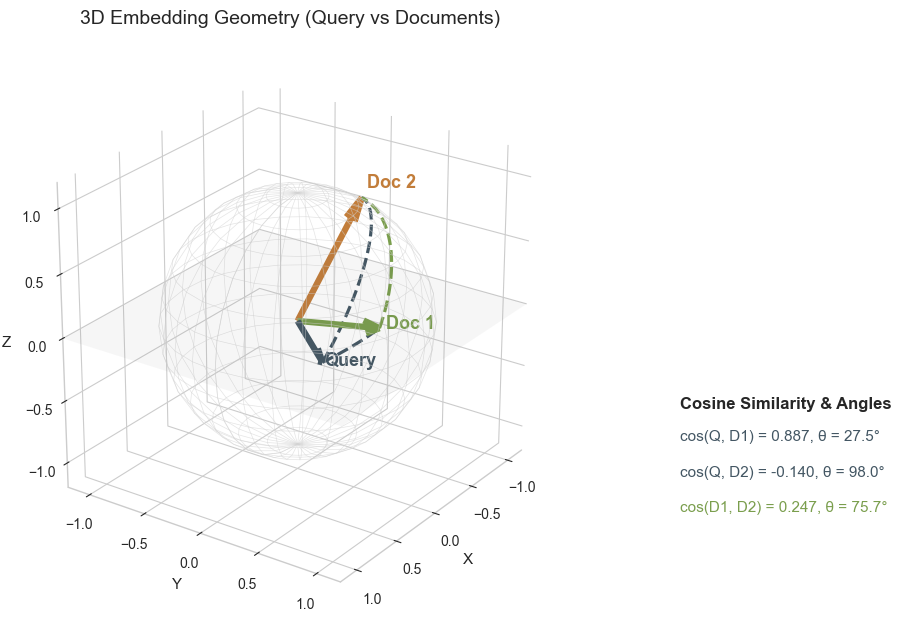

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_vectors_pretty(q, d1, d2, normalize=True):
    vectors = np.vstack([q, d1, d2])

    # --- normalize so everything lies on the unit sphere ---
    if normalize:
        norms = np.linalg.norm(vectors, axis=1, keepdims=True)
        norms[norms == 0] = 1
        vectors = vectors / norms

    q, d1, d2 = vectors
    origin = np.array([0., 0., 0.])

    # --- helpers ---
    def cos_sim(a, b):
        return float(np.dot(a, b) /
                     (np.linalg.norm(a) * np.linalg.norm(b)))

    def angle_deg(a, b):
        return np.degrees(np.arccos(np.clip(cos_sim(a, b), -1, 1)))

    # --- cosines & angles ---
    cos_q_d1 = cos_sim(q, d1)
    cos_q_d2 = cos_sim(q, d2)
    cos_d1_d2 = cos_sim(d1, d2)

    ang_q_d1 = angle_deg(q, d1)
    ang_q_d2 = angle_deg(q, d2)
    ang_d1_d2 = angle_deg(d1, d2)

    # --- figure: 3D plot + sidebar ---
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_axes([0.05, 0.1, 0.72, 0.8], projection='3d')
    ax.set_facecolor("white")

    # ground plane
    xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 2),
                         np.linspace(-1.2, 1.2, 2))
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, alpha=0.05, color="grey")

    # wireframe unit sphere
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color='lightgray',
                      alpha=0.6, linewidth=0.5)

    # draw arrows
    def draw_arrow(vec, color, label):
        ax.quiver(0,0,0, vec[0], vec[1], vec[2],
                  color=color, linewidth=4.5, arrow_length_ratio=0.18)
        ax.text(vec[0]*1.08, vec[1]*1.08, vec[2]*1.08,
                label, color=color, fontsize=13, weight="bold")

    query_color = "#435663"
    doc1_color  = "#7A9E4D"
    doc2_color  = "#C27D3A"

    draw_arrow(q,  query_color, "Query")
    draw_arrow(d1, doc1_color,  "Doc 1")
    draw_arrow(d2, doc2_color,  "Doc 2")

    # --- angle arcs between vectors ---
    def draw_angle_arc(a, b, color):
        # parametric geodesic (great circle) interpolation
        num_pts = 60
        pts = []
        for t in np.linspace(0, 1, num_pts):
            x = (1 - t) * a + t * b
            x = x / np.linalg.norm(x)
            pts.append(x)
        pts = np.array(pts)
        ax.plot(pts[:,0], pts[:,1], pts[:,2],
                color=color, linewidth=2.3, linestyle="--")

    draw_angle_arc(q,  d1, query_color)
    draw_angle_arc(q,  d2, query_color)
    draw_angle_arc(d1, d2, doc1_color)

    # styling
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel("X", fontsize=11)
    ax.set_ylabel("Y", fontsize=11)
    ax.set_zlabel("Z", fontsize=11)
    ax.set_box_aspect([1, 1, 1])
    ax.view_init(elev=25, azim=35)

    ax.set_title("3D Embedding Geometry (Query vs Documents)",
                 fontsize=14, pad=18)

    ax.grid(True, linestyle=":", linewidth=0.5)
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis.pane.set_alpha(0.0)

    # --- smaller sidebar ---
    ax_side = fig.add_axes([0.80, 0.1, 0.14, 0.3])
    ax_side.axis("off")

    ax_side.text(0.0, 0.95, "Cosine Similarity & Angles", fontsize=12, weight="bold")

    ax_side.text(0.0, 0.80,
                 f"cos(Q, D1) = {cos_q_d1:.3f}, θ = {ang_q_d1:.1f}°",
                 color=query_color, fontsize=11)

    ax_side.text(0.0, 0.63,
                 f"cos(Q, D2) = {cos_q_d2:.3f}, θ = {ang_q_d2:.1f}°",
                 color=query_color, fontsize=11)

    ax_side.text(0.0, 0.46,
                 f"cos(D1, D2) = {cos_d1_d2:.3f}, θ = {ang_d1_d2:.1f}°",
                 color=doc1_color, fontsize=11)

    plt.show()


# Example
q  = np.array([1.0, 1.0, 0.2])
d1 = np.array([0.2, 0.6, 0.2])
d2 = np.array([-0.6, 0.2, 0.9])

visualize_3d_vectors_pretty(q, d1, d2)
